**Visualizing and Predicting Heart Diseases with an Interactive Dash Board**

**Team ID :** PNT2022TMID49153

**Sprint 1**

Dataset link : https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc,plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFwe, f_regression

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

In [21]:
from google.colab import files
upload=files.upload()
heart = pd.read_csv('Heart_Disease_Prediction.csv')
heart.head(10)

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction (4).csv


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


using **info()** method to get the concise summary of the dataframe

In [23]:
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

Creating a copy of dataset so that wilt not affect our originat dataset.

In [24]:
heart_df = heart.copy()

Renaming the column

In [25]:
heart_df = heart_df.rename(columns={'condition':'target'})
heart_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Let's check if there is any Null value using **isnull()** method

In [26]:
heart_df.isnull().values.any()

False

this is the visual representation of null values present in data

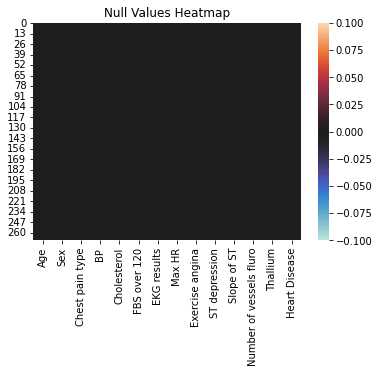

In [27]:
sns.heatmap(heart_df.isnull(),cmap="icefire")
plt.title('Null Values Heatmap')
plt.show()

lets find unique values in dataset using **nunique()** method. it exclude NA values by default.

In [28]:
heart_df.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

In [44]:
heart_df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [45]:
heart_df.apply(lambda x:len(x.unique()))

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

In [48]:
print('Chest pain type ',heart['Chest pain type'].unique())
print('Heart Disease ',heart['Heart Disease'].unique())
print('Thallium ',heart['Thallium'].unique())
print('Number of vessels fluro ',heart['Number of vessels fluro'].unique())
print('Slope of ST ',heart['Slope of ST'].unique())
print('EKG results ',heart['EKG results'].unique())

Chest pain type  [4 3 2 1]
Heart Disease  ['Presence' 'Absence']
Thallium  [3 7 6]
Number of vessels fluro  [3 0 1 2]
Slope of ST  [2 1 3]
EKG results  [2 0 1]


In [50]:
heart_df['Chest pain type'].value_counts()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64